<a href="https://colab.research.google.com/github/vanessabmdf/CGC/blob/master/BNs_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install twelvedata
!pip install websocket
!pip install pymc
!pip install mplfinance
!pip install finquant
!pip install quantstats
!pip install scipy
!pip install seaborn
!pip install tabulate
!pip install yfinance
!pip install plotly
!pip install pyrtfolio==0.4
!pip install PyPortfolioOpt
!pip install fredapi
!pip install pgmpy
!pip install arviz

In [ ]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pip
import websocket
import twelvedata
import pymc
import pymc3 as pm
import theano
import theano.tensor as T
import mplfinance
import finquant
import quantstats as qs
import scipy
import seaborn as sns
import tabulate
import yfinance
import plotly
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pandas_datareader import data as web
from datetime import datetime
import pathlib
from finquant.portfolio import build_portfolio
from fredapi import Fred
from pgmpy.models import BayesianModel
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from warnings import filterwarnings
import arviz as az
plt.style.use('fivethirtyeight')

In [ ]:
#TD
from twelvedata import TDClient
#TD key
td = TDClient(apikey="774bb377d45f4f11a4025e7e303e346a")

In [ ]:
fred = Fred(api_key='51730ca1a5d28f79ba12fe1b75b648e7')

In [ ]:
#(EUR/USD)
ts = td.time_series(
    symbol=['EUR/USD'],
    interval="1day",
    outputsize=5000,
)

ts.as_pandas()

In [ ]:
eurusd_df = ts.as_pandas()

In [ ]:
eurusd_df


,open,high,low,close
datetime,,,,
2020-10-15,1.17050,1.17460,1.16940,1.17215
2020-10-14,1.17520,1.17590,1.16890,1.17045
2020-10-13,1.17480,1.17710,1.17195,1.17520
2020-10-12,1.18125,1.18170,1.17305,1.17490
2020-10-11,1.18065,1.18275,1.17870,1.18130
...,...,...,...,...
2001-10-23,0.89110,0.89300,0.88670,0.89020
2001-10-22,0.89830,0.90040,0.88950,0.89220
2001-10-19,0.90330,0.90360,0.89640,0.89920


In [ ]:
#(VIX)
ts = td.time_series(
    symbol=['VIX'],
    interval="1day",
    outputsize=5000,
)
ts.as_pandas()

In [ ]:
vix_df = ts.as_pandas()

In [ ]:
vix_df

,open,high,low,close,volume
datetime,,,,,
2020-10-16,26.85,26.91,26.19,26.34,0
2020-10-15,28.52,28.92,26.82,26.96,0
2020-10-14,25.92,27.23,25.54,26.37,0
2020-10-13,25.74,26.93,25.59,25.99,0
2020-10-12,25.04,25.56,25.00,25.18,0
...,...,...,...,...,...
2000-12-05,27.28,27.31,24.97,24.99,0
2000-12-04,28.55,28.74,27.65,27.78,0
2000-12-01,28.31,28.39,27.08,27.48,0


In [ ]:
#(SPX)
ts = td.time_series(
    symbol=['SPX'],
    interval="1day",
    outputsize=5000,
)
ts.as_pandas()

In [ ]:
spx_df = ts.as_pandas()

In [ ]:
spx_df
spx_df.dtypes

open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

In [ ]:
fred.search('Money Stock')

In [ ]:
#MoneyStock2 Weekly
m2_s = fred.get_series('M2')
print(m2_s)

1980-11-03     1591.4
1980-11-10     1592.9
1980-11-17     1596.3
1980-11-24     1597.2
1980-12-01     1596.1
               ...   
2020-09-07    18576.7
2020-09-14    18701.0
2020-09-21    18720.2
2020-09-28    18652.1
2020-10-05    18699.3
Length: 2084, dtype: float64


In [ ]:
#MoneyStock1 Weekly
m1_s = fred.get_series('M1')
print(m1_s)

In [ ]:
#MoneyStock2 Velocity Quaterly
m2_v = fred.get_series('M2V')
print(m2_v)

In [ ]:
#WALCL Assets: Total Assets: Total Assets (Less Eliminations from Consolidation): Wednesday Level
walcl = fred.get_series('WALCL')
print(walcl)

In [ ]:
#WTREGEN Liabilities and Capital: Liabilities: Deposits with F.R. Banks, Other Than Reserve Balances: U.S. Treasury, General Account: Week Average
wtregen = fred.get_series('WTREGEN')
print(wtregen)

In [ ]:
#DFII10  10-Year Treasury Inflation-Indexed Security, Constant Maturity, Daily
dfii10 = fred.get_series('DFII10')
print (dfii10)

In [ ]:
#FII10  10-Year Treasury Inflation-Indexed Security, Constant Maturity, Monthly
fii10 = fred.get_series('FII10')
print (fii10)

In [ ]:
#DFII5  5-Year Treasury Inflation-Indexed Security, Constant Maturity, Daily
dfii5 = fred.get_series('DFII5')
print (dfii5)

In [ ]:
#FII5  5-Year Treasury Inflation-Indexed Security, Constant Maturity, Monthly
fii5 = fred.get_series('FII5')
print (fii5)

In [ ]:
#UMCSENT  University of Michigan: Consumer Sentiment, Monthly
umcsent = fred.get_series('UMCSENT')
print(umcsent)

In [ ]:
#STLFSI2  St. Louis Fed Financial Stress Index, Weekly
stlfsi2 = fred.get_series('STLFSI2')
print(stlfsi2)

In [ ]:
#CPIAUCSL  Consumer Price Index for All Urban Consumers: All Items in U.S. City Average, Monthly
cpiaucsl = fred.get_series('CPIAUCSL')
print(cpiaucsl)

In [ ]:
#U6RATE Total Unemployed, Plus All Persons Marginally Attached to the Labor Force, Plus Total Employed Part Time for Economic Reasons, as a Percent of the Civilian Labor Force Plus All Persons Marginally Attached to the Labor Force (U-6), Monthly
u6rate = fred.get_series('U6RATE')
print(u6rate)

In [ ]:
u6rate_change = u6rate.pct_change()
print(u6rate_change)

state_value = ('UP' or 'DOWN')

state_value['UP'] = u6rate_change >= 0
state_value['DOWN'] = u6rate_change <= 0

state_value


1994-01-01         NaN
1994-02-01   -0.025641
1994-03-01    0.008772
1994-04-01   -0.017391
1994-05-01   -0.035398
                ...   
2020-05-01   -0.070175
2020-06-01   -0.150943
2020-07-01   -0.083333
2020-08-01   -0.139394
2020-09-01   -0.098592
Length: 321, dtype: float64


TypeError: ignored

In [ ]:
fred.search('')

In [ ]:
%config InlineBackend.figure_format = 'retina'
floatX = theano.config.floatX
filterwarnings('ignore')
sns.set_style('white')

In [ ]:
X, Y = make_moons(noise=0.2, random_state=0, n_samples=1000)
X = scale(X)
X = X.astype(floatX)
Y = Y.astype(floatX)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.5)

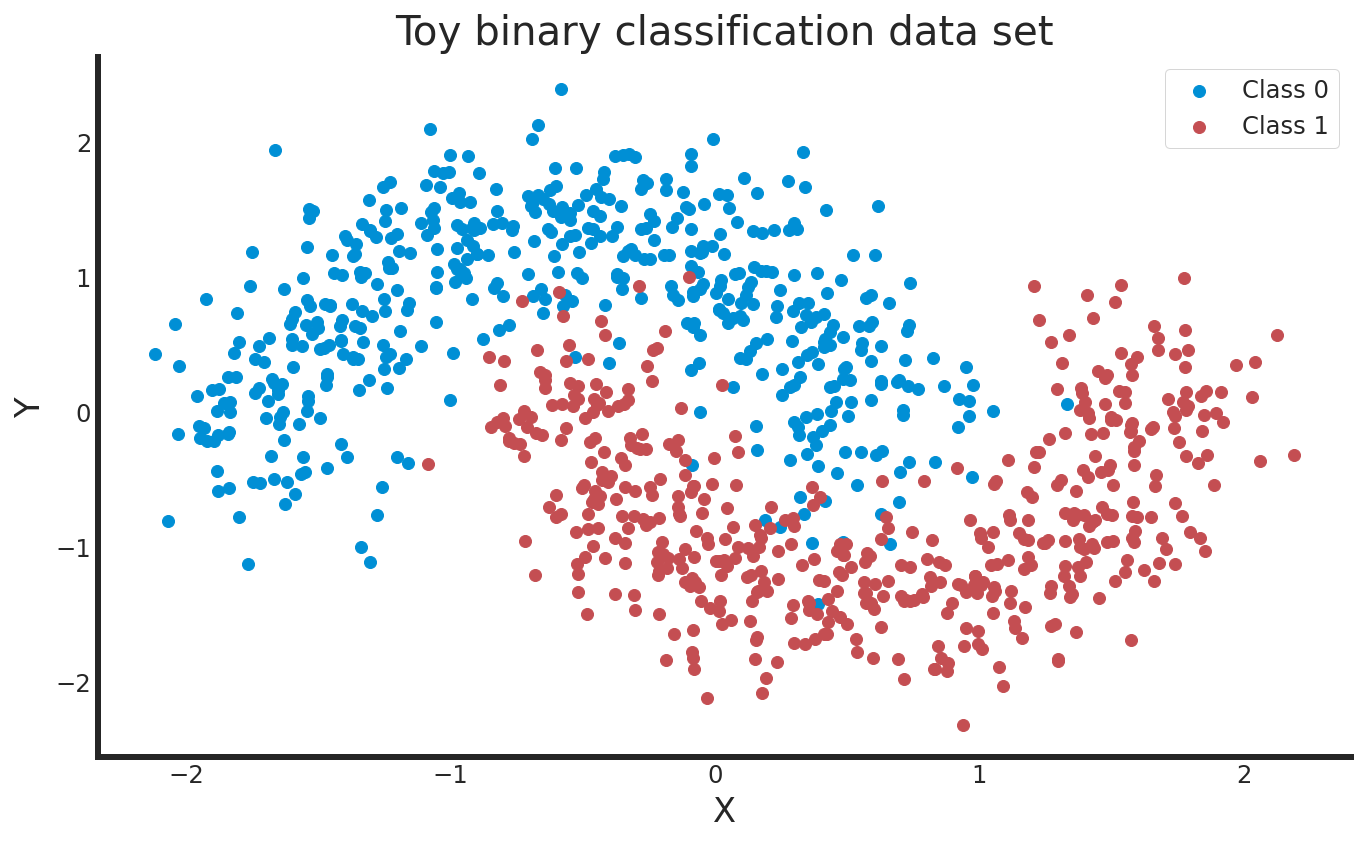

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X[Y==0, 0], X[Y==0, 1], label='Class 0')
ax.scatter(X[Y==1, 0], X[Y==1, 1], color='r', label='Class 1')
sns.despine(); ax.legend()
ax.set(xlabel='X', ylabel='Y', title='Toy binary classification data set');


In [ ]:
def construct_nn(ann_input, ann_output):
    n_hidden = 5

    # Initialize random weights between each layer
    init_1 = np.random.randn(X.shape[1], n_hidden).astype(floatX)
    init_2 = np.random.randn(n_hidden, n_hidden).astype(floatX)
    init_out = np.random.randn(n_hidden).astype(floatX)

    with pm.Model() as neural_network:
        # Trick: Turn inputs and outputs into shared variables using the data container pm.Data
        # It's still the same thing, but we can later change the values of the shared variable
        # (to switch in the test-data later) and pymc3 will just use the new data.
        # Kind-of like a pointer we can redirect.
        # For more info, see: http://deeplearning.net/software/theano/library/compile/shared.html
        ann_input = pm.Data('ann_input', X_train)
        ann_output = pm.Data('ann_output', Y_train)

        # Weights from input to hidden layer
        weights_in_1 = pm.Normal('w_in_1', 0, sigma=1,
                                 shape=(X.shape[1], n_hidden),
                                 testval=init_1)

        # Weights from 1st to 2nd layer
        weights_1_2 = pm.Normal('w_1_2', 0, sigma=1,
                                shape=(n_hidden, n_hidden),
                                testval=init_2)

        # Weights from hidden layer to output
        weights_2_out = pm.Normal('w_2_out', 0, sigma=1,
                                  shape=(n_hidden,),
                                  testval=init_out)

        # Build neural-network using tanh activation function
        act_1 = pm.math.tanh(pm.math.dot(ann_input,
                                         weights_in_1))
        act_2 = pm.math.tanh(pm.math.dot(act_1,
                                         weights_1_2))
        act_out = pm.math.sigmoid(pm.math.dot(act_2,
                                              weights_2_out))

        # Binary classification -> Bernoulli likelihood
        out = pm.Bernoulli('out',
                           act_out,
                           observed=ann_output,
                           total_size=Y_train.shape[0] # IMPORTANT for minibatches
                          )
    return neural_network

neural_network = construct_nn(X_train, Y_train)

In [ ]:
from pymc3.theanof import set_tt_rng, MRG_RandomStreams
set_tt_rng(MRG_RandomStreams(42))

In [ ]:
%%time

with neural_network:
    inference = pm.ADVI()
    approx = pm.fit(n=30000, method=inference)

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
Average Loss = 183.96: 100%|██████████| 30000/30000 [00:38<00:00, 777.58it/s]
Finished [100%]: Average Loss = 183.93


CPU times: user 34.7 s, sys: 4.02 s, total: 38.8 s
Wall time: 1min 28s


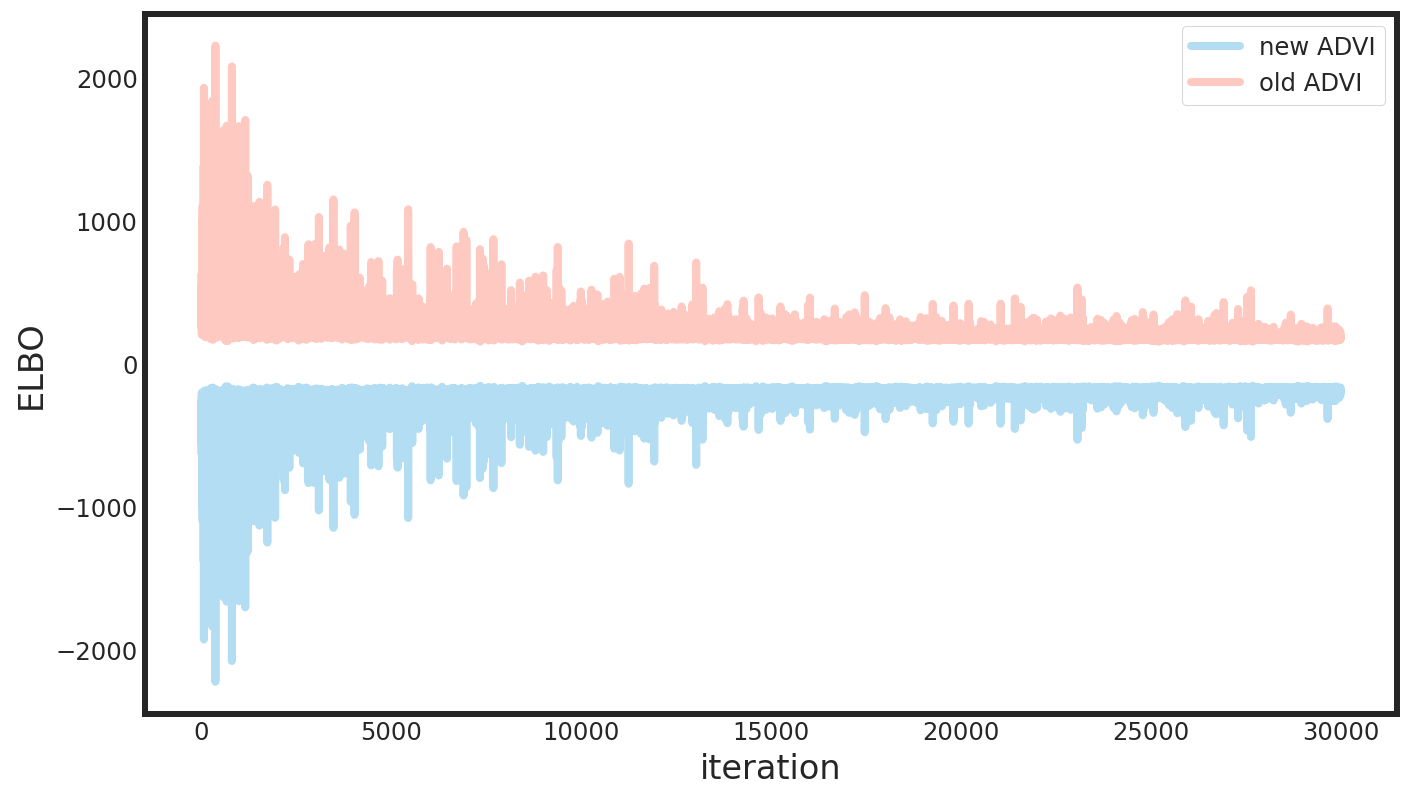

In [ ]:
plt.plot(-inference.hist, label='new ADVI', alpha=.3)
plt.plot(approx.hist, label='old ADVI', alpha=.3)
plt.legend()
plt.ylabel('ELBO')
plt.xlabel('iteration');

In [ ]:
trace = approx.sample(draws=5000)

In [ ]:
# We can get predicted probability from model
neural_network.out.distribution.p

sigmoid.0

In [ ]:
# create symbolic input
x = T.matrix('X')
# symbolic number of samples is supported, we build vectorized posterior on the fly
n = T.iscalar('n')
# Do not forget test_values or set theano.config.compute_test_value = 'off'
x.tag.test_value = np.empty_like(X_train[:10])
n.tag.test_value = 100
_sample_proba = approx.sample_node(neural_network.out.distribution.p,
                                   size=n,
                                   more_replacements={neural_network['ann_input']: x})
# It is time to compile the function
# No updates are needed for Approximation random generator
# Efficient vectorized form of sampling is used
sample_proba = theano.function([x, n], _sample_proba)

# Create bechmark functions
def production_step1():
    pm.set_data(new_data={'ann_input': X_test, 'ann_output': Y_test}, model=neural_network)
    ppc = pm.sample_posterior_predictive(trace, samples=500, progressbar=False, model=neural_network)

    # Use probability of > 0.5 to assume prediction of class 1
    pred = ppc['out'].mean(axis=0) > 0.5

def production_step2():
    sample_proba(X_test, 500).mean(0) > 0.5

In [ ]:
%timeit production_step1()

1 loop, best of 3: 5.22 s per loop


In [ ]:
%timeit production_step2()

10 loops, best of 3: 110 ms per loop


In [ ]:
pred = sample_proba(X_test, 500).mean(0) > 0.5

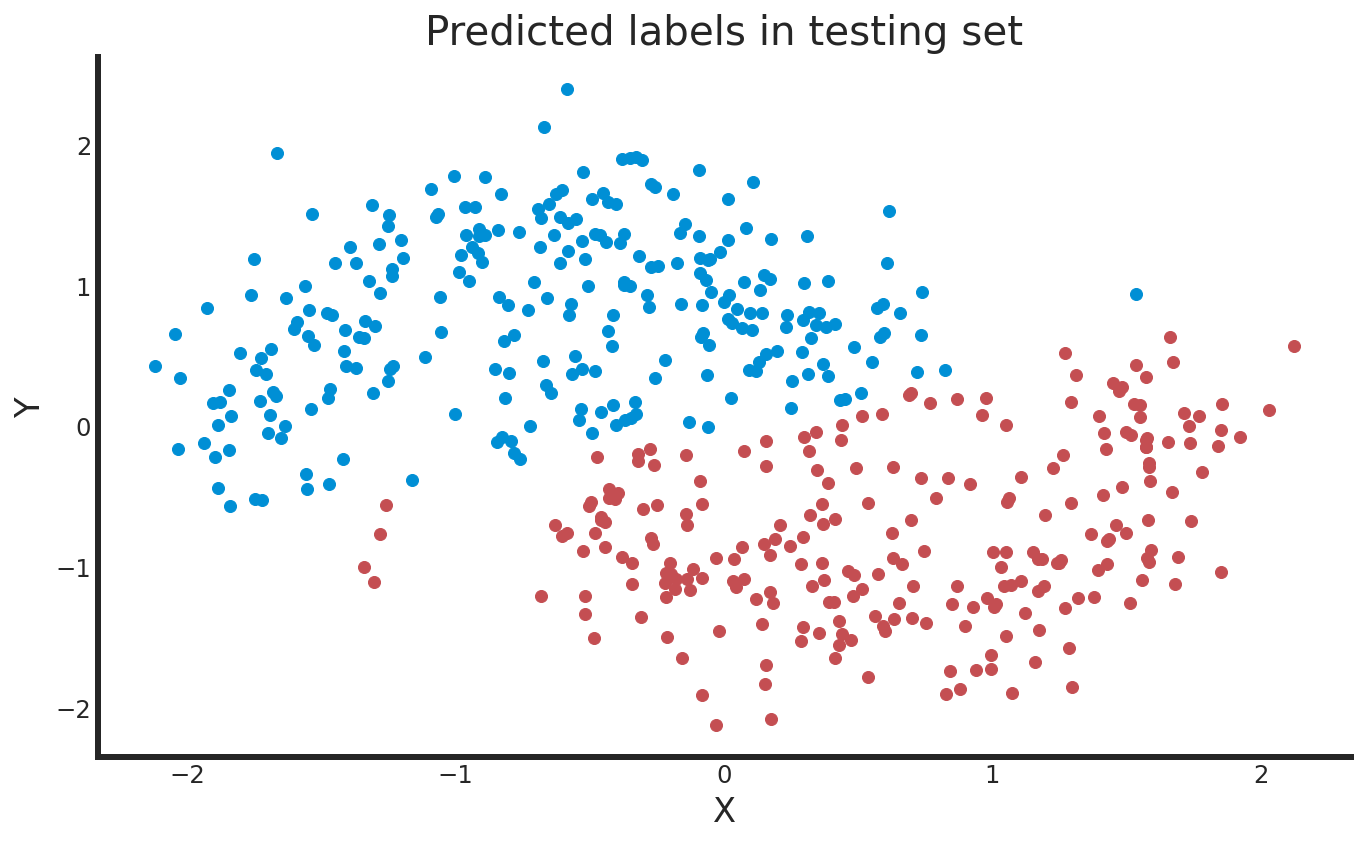

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X_test[pred==0, 0], X_test[pred==0, 1])
ax.scatter(X_test[pred==1, 0], X_test[pred==1, 1], color='r')
sns.despine()
ax.set(title='Predicted labels in testing set', xlabel='X', ylabel='Y');

In [ ]:
print('Accuracy = {}%'.format((Y_test == pred).mean() * 100))

Accuracy = 86.0%


In [ ]:
grid = pm.floatX(np.mgrid[-3:3:100j,-3:3:100j])
grid_2d = grid.reshape(2, -1).T
dummy_out = np.ones(grid.shape[1], dtype=np.int8)

In [ ]:
ppc = sample_proba(grid_2d ,500)

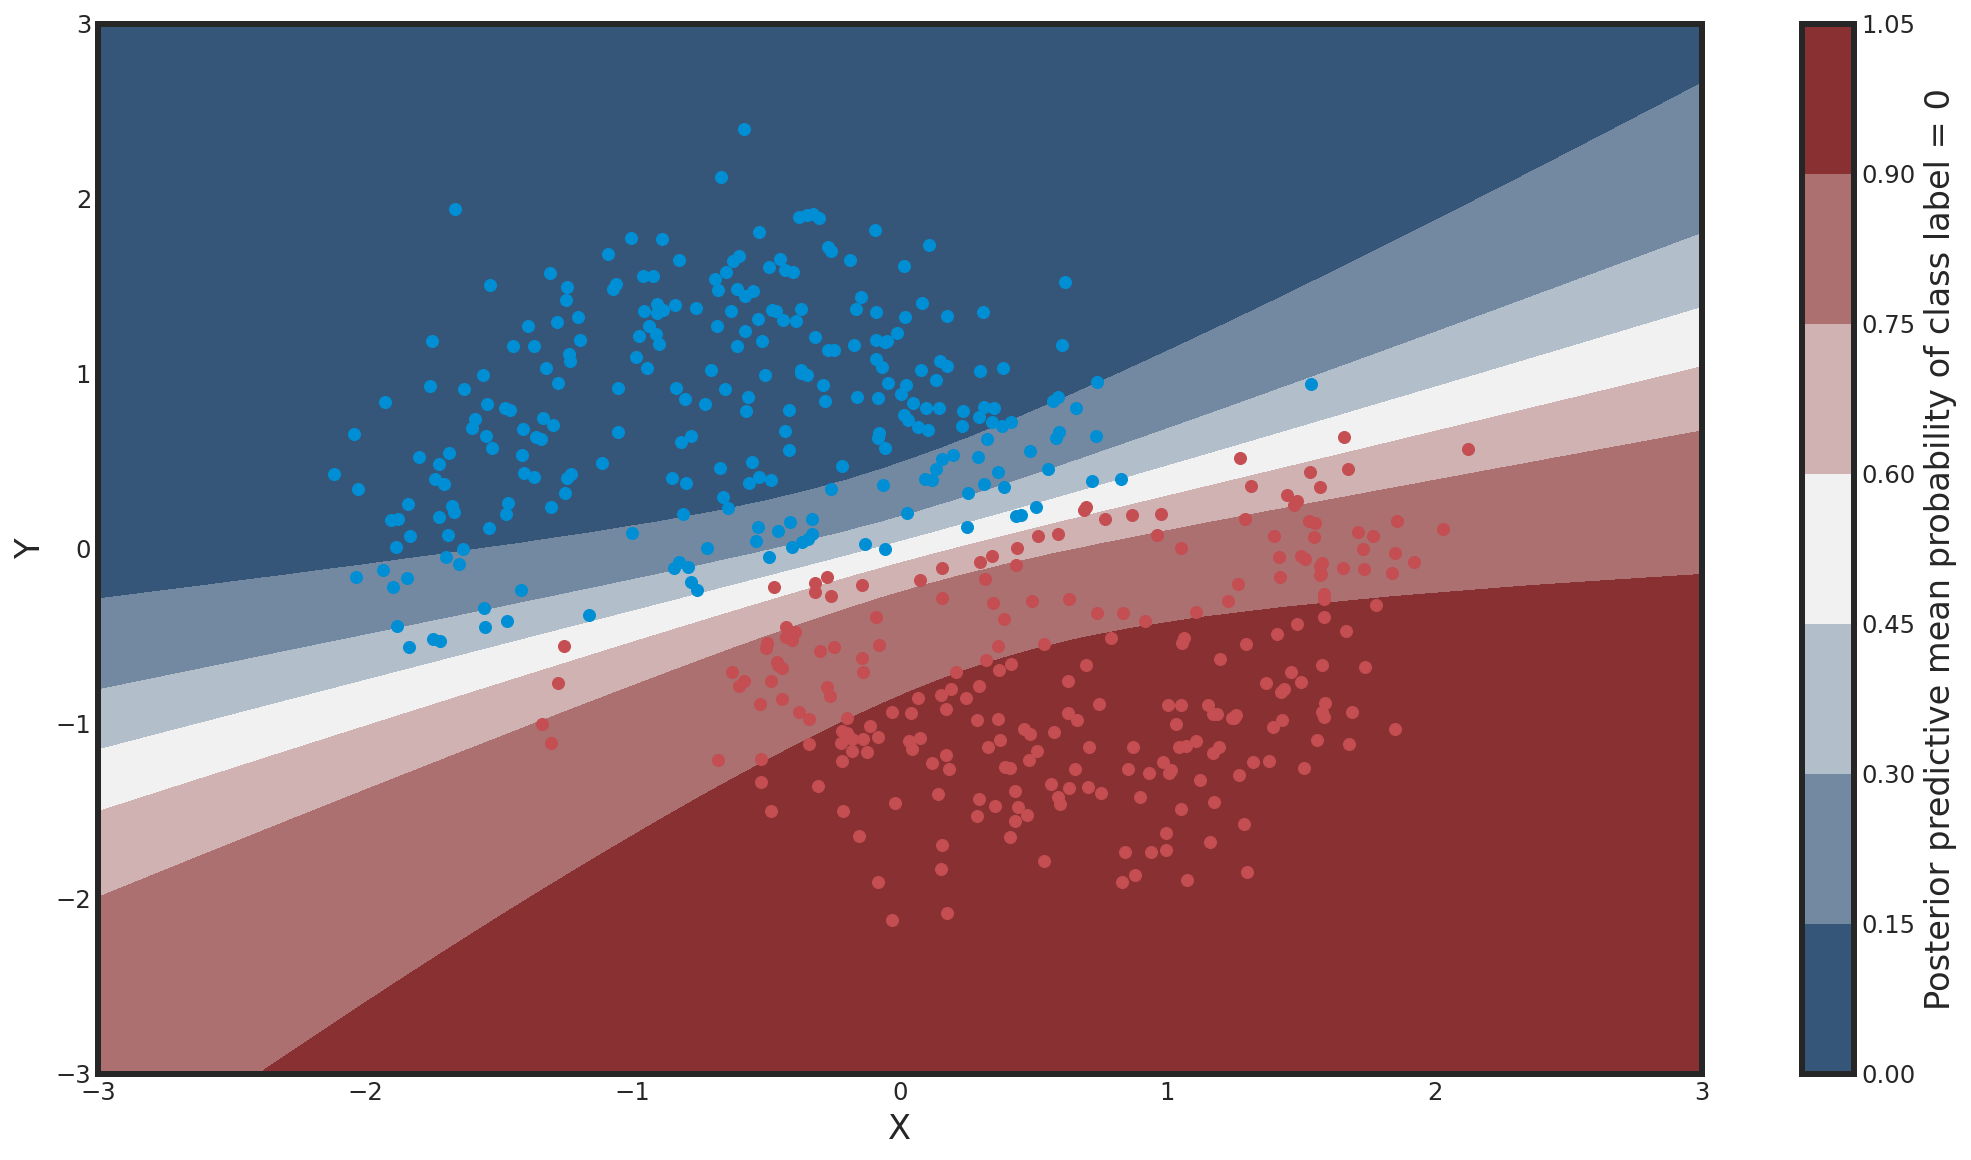

In [ ]:
cmap = sns.diverging_palette(250, 12, s=85, l=25, as_cmap=True)
fig, ax = plt.subplots(figsize=(16, 9))
contour = ax.contourf(grid[0], grid[1], ppc.mean(axis=0).reshape(100, 100), cmap=cmap)
ax.scatter(X_test[pred==0, 0], X_test[pred==0, 1])
ax.scatter(X_test[pred==1, 0], X_test[pred==1, 1], color='r')
cbar = plt.colorbar(contour, ax=ax)
_ = ax.set(xlim=(-3, 3), ylim=(-3, 3), xlabel='X', ylabel='Y');
cbar.ax.set_ylabel('Posterior predictive mean probability of class label = 0');

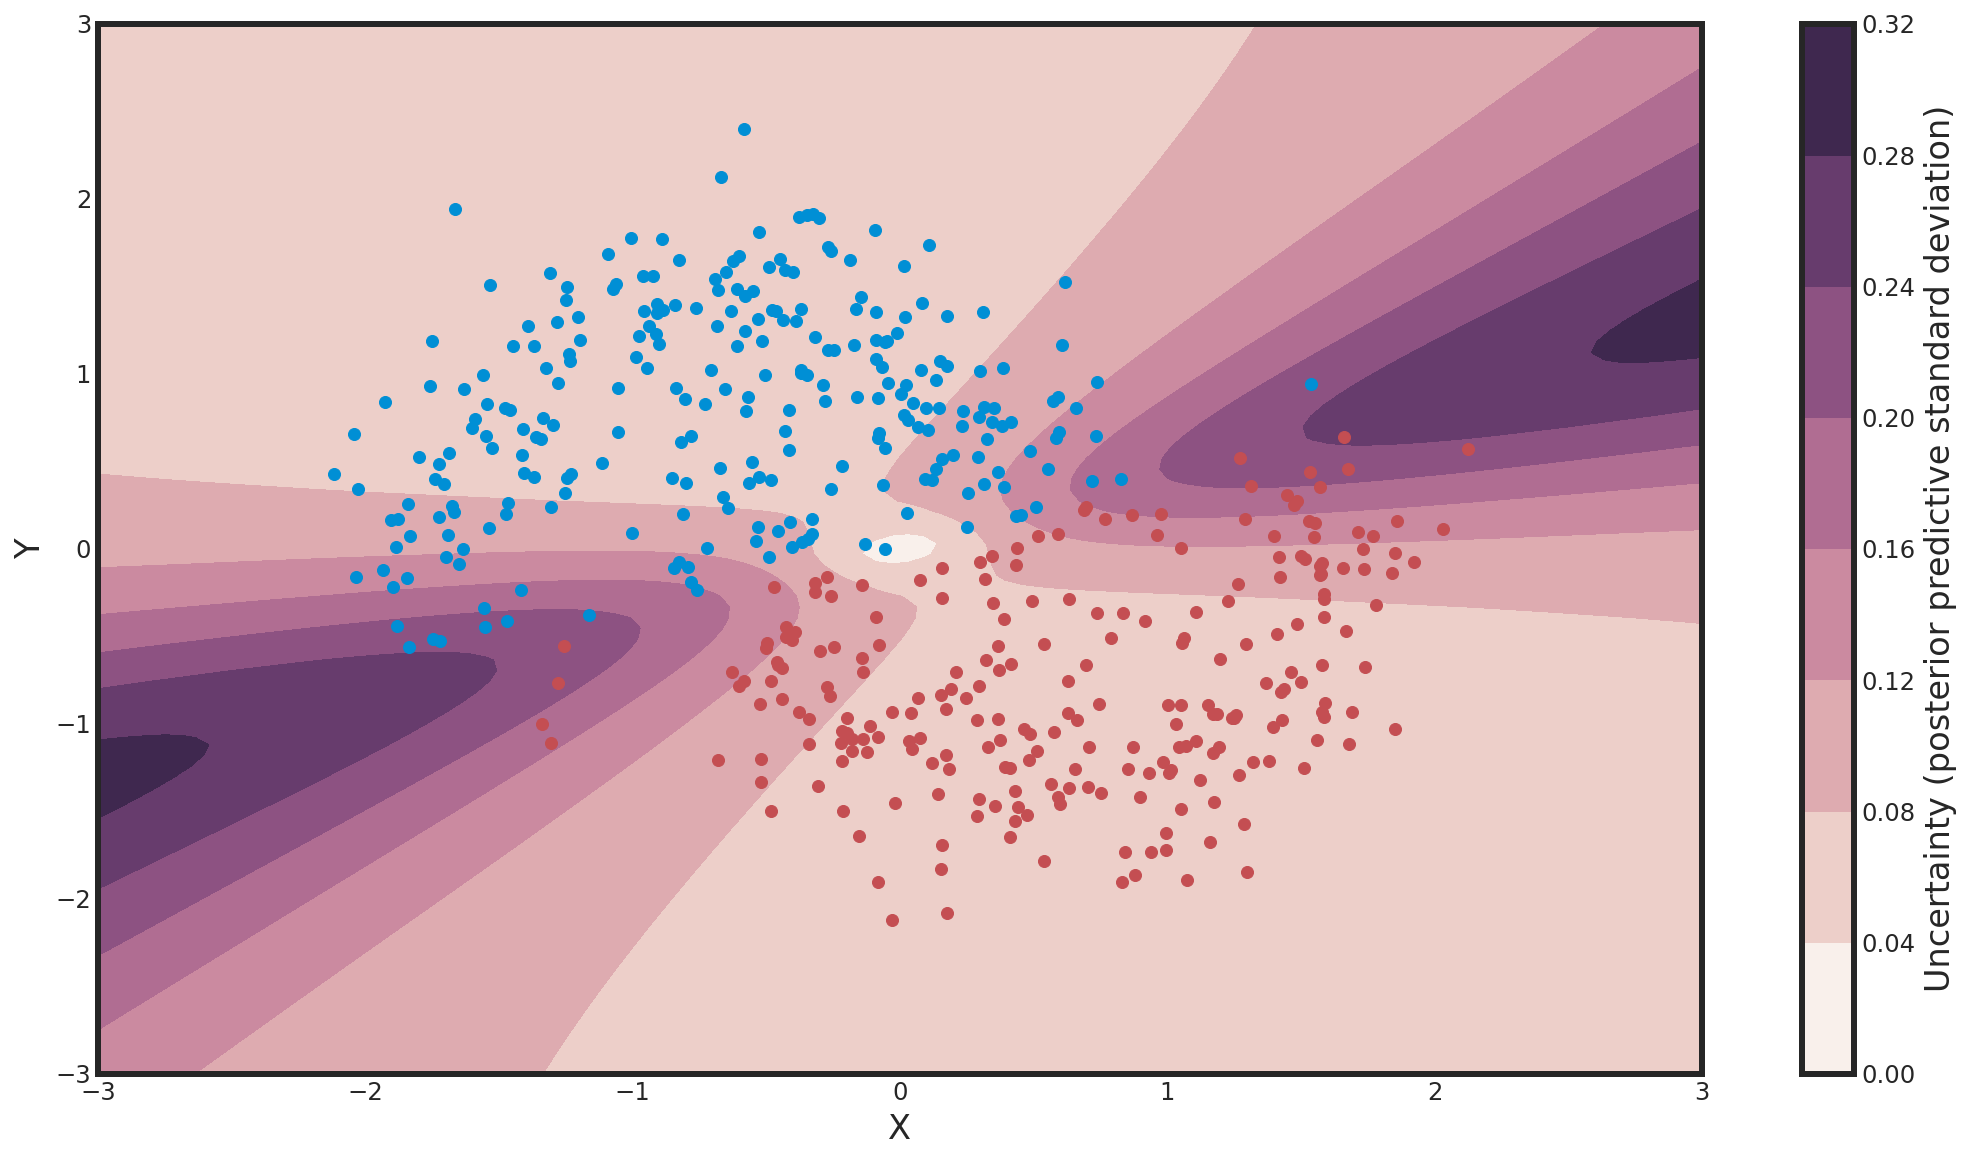

In [ ]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, ax = plt.subplots(figsize=(16, 9))
contour = ax.contourf(grid[0], grid[1], ppc.std(axis=0).reshape(100, 100), cmap=cmap)
ax.scatter(X_test[pred==0, 0], X_test[pred==0, 1])
ax.scatter(X_test[pred==1, 0], X_test[pred==1, 1], color='r')
cbar = plt.colorbar(contour, ax=ax)
_ = ax.set(xlim=(-3, 3), ylim=(-3, 3), xlabel='X', ylabel='Y');
cbar.ax.set_ylabel('Uncertainty (posterior predictive standard deviation)');

In [ ]:
minibatch_x = pm.Minibatch(X_train, batch_size=50)
minibatch_y = pm.Minibatch(Y_train, batch_size=50)
neural_network_minibatch = construct_nn(minibatch_x, minibatch_y)
with neural_network_minibatch:
    approx = pm.fit(40000, method=pm.ADVI())

Average Loss = 121.36: 100%|██████████| 40000/40000 [00:51<00:00, 782.51it/s]
Finished [100%]: Average Loss = 121.43


Text(0.5, 0, 'iteration')

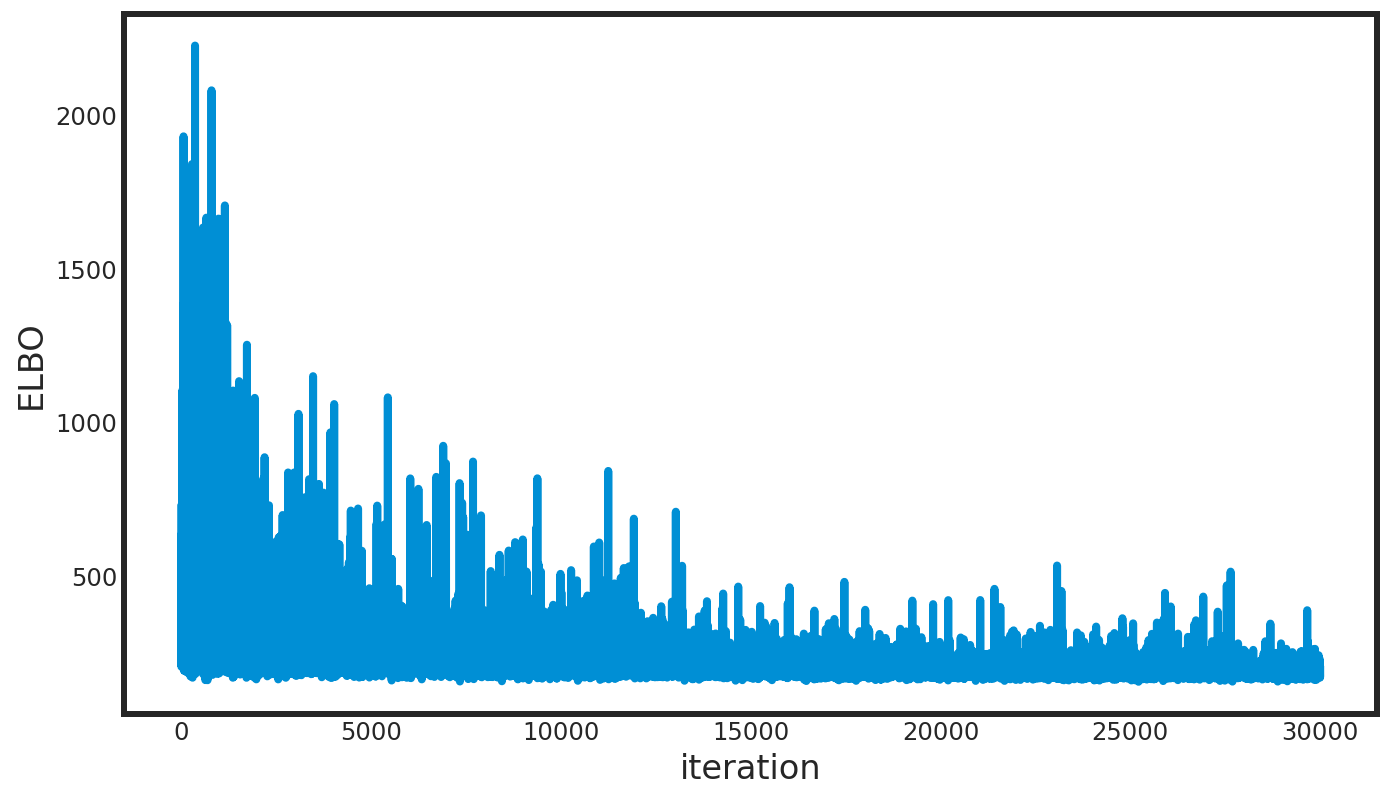

In [ ]:
plt.plot(inference.hist)
plt.ylabel('ELBO')
plt.xlabel('iteration')